In [36]:
from datasets import load_dataset

# Load private dataset
#dataset = load_dataset("mikeriess/LM_Da_test_100_llama-3.3-70b-instruct")
#dataset = load_dataset("mikeriess/LM_Da_test_100_llama-3.1-405b-instruct-fp8")
#dataset = load_dataset("mikeriess/LM_dialogues1", revision="0827e2f7f30c6192f71113ab579067c4fbda3b0f")
#dataset = load_dataset("mikeriess/LM_dialogues3_gemma9b")
dataset = load_dataset("mikeriess/LM_dialogues3_gemma27b")

README.md:   0%|          | 0.00/975 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/33.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10 [00:00<?, ? examples/s]

In [37]:
# Convert to pandas and then to dictionary format
df = dataset['train'].to_pandas()
df.head()

,model,conversation_id,orig_messages,synthetic_messages,orig_message_count,synthetic_message_count,message_count_diff,orig_total_length,synthetic_total_length,orig_total_tokens,synthetic_total_tokens
0,google/gemma-2-27b-it,2,"[{'order': 1, 'text': 'I anledning af Popmusic...","[{'order': 1, 'text': 'Jeg har lige set jeres ...",7,7,0,1913,134,340,134
1,google/gemma-2-27b-it,4,"[{'order': 1, 'text': 'Superforum, Holger!!! :...","[{'order': 1, 'text': 'Hej, jeg har et spørgsm...",6,6,0,2135,174,406,174
2,google/gemma-2-27b-it,28,"[{'order': 1, 'text': 'Hej . Jeg har længe stu...","[{'order': 1, 'text': 'Mit problem er, at min ...",7,7,0,1170,125,221,125
3,google/gemma-2-27b-it,29,"[{'order': 1, 'text': 'Jeg tillader mig lige a...","[{'order': 1, 'text': 'Jeg leder efter nogle g...",9,9,0,2300,214,434,214
4,google/gemma-2-27b-it,30,"[{'order': 1, 'text': 'Jeg har et stykke vokal...","[{'order': 1, 'text': 'Jeg har en vokaloptagel...",7,7,0,1912,144,373,144


# Inspect original vs synthetic messages

In [38]:

# Example usage:
inspect_conversation_pair(df, 0)  # View first conversation

Conversation #0

Synthetic Messages:
--------------------------------------------------
Turn 1 (User 1):
--------------------
Jeg har lige set jeres konkurrence om Hit Kit V3, lyder spændende! Men jeg er lidt forvirret, hvor mange brugere skal der være tilmeldt før lodtrækningen finder sted?

Turn 2 (User 2):
--------------------
Det er de første 100 brugere, der tilmelder sig, der deltager i lodtrækningen. Jeg trækker lod lige så snart vi når 100 brugere.

Turn 3 (User 1):
--------------------
Aha, så der er jo ingen grund til at vente længere? Jeg tilmelder mig med det samme!

Turn 4 (User 2):
--------------------
Rigtig gode! Velkommen til forummet og held og lykke med lodtrækningen.

Turn 5 (User 1):
--------------------
Tak! Jeg håber da, jeg er heldig. Jeg har aldrig prøvet Hit Kit før, men jeg har hørt rigtig godt om det.

Turn 6 (User 2):
--------------------
Det er et fedt produkt! Hit Kit V3 bliver endnu bedre end de tidligere versioner med flere lyde, kategorier og et nyt ka

In [40]:
inspect_conversation_pair(df, 5) 

Conversation #5

Synthetic Messages:
--------------------------------------------------
Turn 1 (User 1):
--------------------
Jeg er i tvivl om jeg skal købe et UAD eller et Powercore DSP-kort. Jeg har hørt godt om begge, men ved ikke helt, hvilket der passer bedst til mig. Jeg laver primært elektronisk musik og har brug for gode EQ's og compressors.

Turn 2 (User 2):
--------------------
Begge kort har sine fordele. UAD er kendt for sine fantastiske emuleringer af klassiske hardware-plugins, mens Powercore har et bredere udvalg af plugins og generelt er mere stabilt.

Turn 3 (User 1):
--------------------
Hvad med latency? Er der stor forskel?

Turn 4 (User 2):
--------------------
Powercore kan være lidt mere følsom over for lave latencies, men generelt er begge kort ret gode i den henseende.

Turn 5 (User 1):
--------------------
Jeg har også hørt, at UAD's nye plugins kræver mere og mere processing power. Er det rigtigt?

Turn 6 (User 2):
--------------------
Ja, det er korrekt. De

In [20]:
def inspect_conversation_pair(df, idx):
    """
    Display original and synthetic messages side by side for a given conversation index
    """
    orig = df.iloc[idx]['orig_messages']
    synth = df.iloc[idx]['synthetic_messages']
    
    print(f"Conversation #{idx}")
    print("=" * 100)
   
    print("\nSynthetic Messages:")
    print("-" * 50)
    for msg in synth:
        print(f"Turn {msg['order']} (User {msg.get('user', 'N/A')}):")
        print("-" * 20)
        print(f"{msg['text']}\n")
    
    print("\nOriginal Messages:")
    print("-" * 50)
    for msg in orig:
        print(f"Turn {msg['order']} (User {msg.get('user', 'N/A')}):")
        print("-" * 20)
        print(f"{msg['text']}\n")
    
    
    print("=" * 100)

# Example usage:
inspect_conversation_pair(df, 5)  # View first conversation


Conversation #5

Synthetic Messages:
--------------------------------------------------
Turn 1 (User 1):
--------------------
Hej, jeg er lidt i tvivl om hvilket DSP-kort jeg skal vælge. Jeg har kig på enten et Universal Audio kort eller et Powercore kort. Jeg ved, at begge har gode plugins, men jeg er ikke sikker på, hvilket der er bedst for mig.

Turn 2 (User 2):
--------------------
Jeg har prøvet begge typer kort, og de er begge gode. Powercore har et bredere udvalg af plugins, og de er generelt mere prisvenlige. UAD har dog nogle virkelig fantastiske plugins, især deres compressorer og EQ's.

Turn 3 (User 1):
--------------------
Jeg er mest interesseret i at få fat i nogle gode EQ's og compressors. Hvilket kort ville du anbefale til det?

Turn 4 (User 2):
--------------------
Hvis det er EQ's og compressors du er mest interesseret i, ville jeg nok gå med UAD. De har nogle virkelig ikoniske plugins, som LN 1176 og Fairchild, der er uovertruffne.

Turn 5 (User 1):
-----------------

## Tokens
## Current prompt: Asking to keep same number of posts

In [17]:
df.columns

Index(['model', 'conversation_id', 'orig_messages', 'synthetic_messages',
       'orig_message_count', 'synthetic_message_count', 'message_count_diff',
       'orig_total_length', 'synthetic_total_length', 'orig_total_tokens',
       'synthetic_total_tokens'],
      dtype='object')

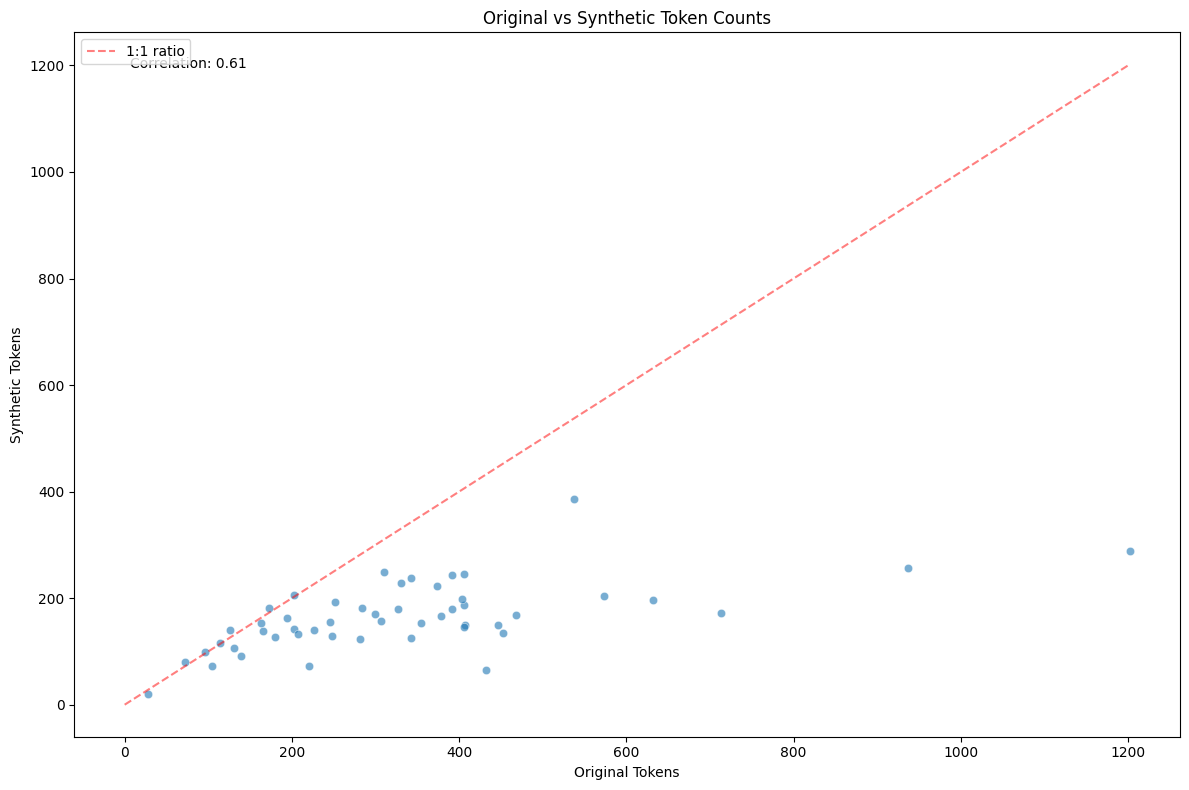


Token Count Statistics:
--------------------------------------------------
Average original tokens: 332.5
Average synthetic tokens: 164.6

Median original tokens: 308.0
Median synthetic tokens: 156.5

Max original tokens: 1202.0
Max synthetic tokens: 387.0

Correlation coefficient: 0.609


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, 
                x='orig_total_tokens', 
                y='synthetic_total_tokens',
                alpha=0.6)

# Add diagonal line representing y=x
max_tokens = max(df['orig_total_tokens'].max(), df['synthetic_total_tokens'].max())
plt.plot([0, max_tokens], [0, max_tokens], 'r--', alpha=0.5, label='1:1 ratio')

# Customize plot
plt.title('Original vs Synthetic Token Counts')
plt.xlabel('Original Tokens')
plt.ylabel('Synthetic Tokens')
plt.legend()

# Add correlation coefficient
correlation = df['orig_total_tokens'].corr(df['synthetic_total_tokens'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes)
"""
# Optional: Add hover annotations
for idx, row in df.iterrows():
    plt.annotate(f'Conv #{idx}',
                (row['orig_total_tokens'], row['synthetic_total_tokens']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.5)
"""
plt.tight_layout()
plt.show()

# Print some basic statistics
print("\nToken Count Statistics:")
print("-" * 50)
print(f"Average original tokens: {df['orig_total_tokens'].mean():.1f}")
print(f"Average synthetic tokens: {df['synthetic_total_tokens'].mean():.1f}")
print(f"\nMedian original tokens: {df['orig_total_tokens'].median():.1f}")
print(f"Median synthetic tokens: {df['synthetic_total_tokens'].median():.1f}")
print(f"\nMax original tokens: {df['orig_total_tokens'].max():.1f}")
print(f"Max synthetic tokens: {df['synthetic_total_tokens'].max():.1f}")
print(f"\nCorrelation coefficient: {correlation:.3f}")


## Previous prompt: 
### Not explicitly asking to generate the same number of posts

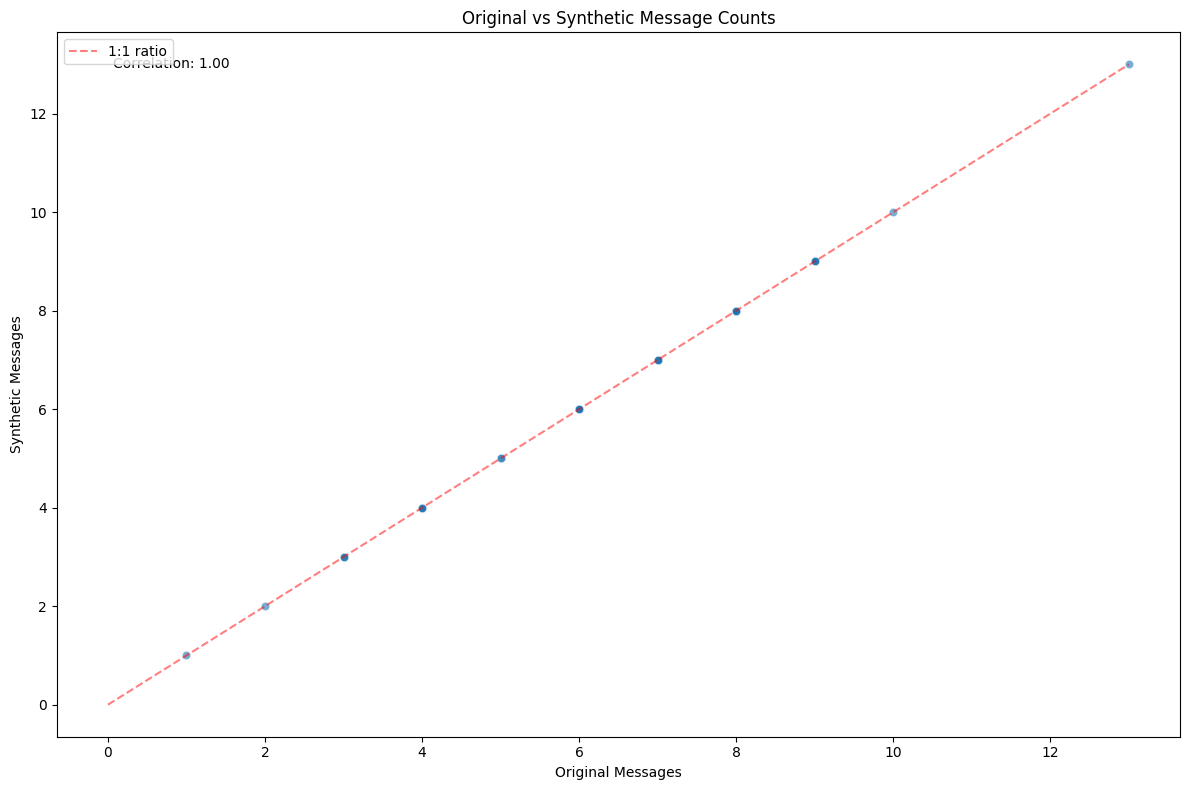


Message Count Statistics:
--------------------------------------------------
Average original messages: 6.5
Average synthetic messages: 6.5

Median original messages: 7.0
Median synthetic messages: 7.0

Correlation coefficient: 1.000


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot for message counts
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, 
                x='orig_message_count', 
                y='synthetic_message_count',
                alpha=0.6)

# Add diagonal line representing y=x
max_count = max(df['orig_message_count'].max(), df['synthetic_message_count'].max())
plt.plot([0, max_count], [0, max_count], 'r--', alpha=0.5, label='1:1 ratio')

# Customize plot
plt.title('Original vs Synthetic Message Counts')
plt.xlabel('Original Messages')
plt.ylabel('Synthetic Messages')
plt.legend()

# Add correlation coefficient
correlation = df['orig_message_count'].corr(df['synthetic_message_count'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes)

"""
# Optional: Add hover annotations
for idx, row in df.iterrows():
    plt.annotate(f'Conv #{idx}',
                (row['orig_message_count'], row['synthetic_message_count']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.5)
"""
plt.tight_layout()
plt.show()

# Print some basic statistics
print("\nMessage Count Statistics:")
print("-" * 50)
print(f"Average original messages: {df['orig_message_count'].mean():.1f}")
print(f"Average synthetic messages: {df['synthetic_message_count'].mean():.1f}")
print(f"\nMedian original messages: {df['orig_message_count'].median():.1f}")
print(f"Median synthetic messages: {df['synthetic_message_count'].median():.1f}")
print(f"\nCorrelation coefficient: {correlation:.3f}")

# Number of users

In [30]:
# Function to extract unique users from messages
def get_unique_users(messages):
    users = set()
    for msg in messages:
        # Handle both float and int user IDs
        if 'user' in msg:
            user_id = int(float(msg['user'])) if isinstance(msg['user'], (int, float)) else msg['user']
            users.add(user_id)
    return users

# Compare user counts for each conversation
results = []
for idx, row in df.iterrows():
    orig_users = get_unique_users(row['orig_messages'])
    synth_users = get_unique_users(row['synthetic_messages'])
    
    results.append({
        'conversation_id': row['conversation_id'],
        'orig_user_count': len(orig_users),
        'synth_user_count': len(synth_users),
        'orig_users': sorted(list(orig_users)),
        'synth_users': sorted(list(synth_users))
    })

# Convert to DataFrame for easy viewing
import pandas as pd
comparison_df = pd.DataFrame(results)

# Display summary statistics
print("Summary of user counts:")
print(comparison_df[['orig_user_count', 'synth_user_count']].describe())

# Display first few rows with full details
print("\nSample comparisons:")
print(comparison_df.head())

# Find conversations with mismatched user counts
mismatched = comparison_df[comparison_df['orig_user_count'] != comparison_df['synth_user_count']]
print(f"\nNumber of conversations with mismatched user counts: {len(mismatched)}")
if len(mismatched) > 0:
    print("\nSample of mismatched conversations:")
    print(mismatched.head())

Summary of user counts:
       orig_user_count  synth_user_count
count        50.000000         50.000000
mean          3.920000          1.980000
std           1.676245          0.141421
min           1.000000          1.000000
25%           3.000000          2.000000
50%           4.000000          2.000000
75%           5.000000          2.000000
max          10.000000          2.000000

Sample comparisons:
  conversation_id  orig_user_count  synth_user_count             orig_users  \
0               2                4                 2          [2, 5, 8, 12]   
1               4                3                 2              [2, 3, 5]   
2              28                6                 2  [1, 2, 8, 17, 31, 45]   
3              29                3                 2             [2, 8, 46]   
4              30                3                 2             [2, 8, 31]   

  synth_users  
0      [1, 2]  
1      [1, 2]  
2      [1, 2]  
3      [1, 2]  
4      [1, 2]  

Number of conv

# Number of messages

Message count statistics:

Original messages:
count    50.000000
mean      6.540000
std       2.149608
min       1.000000
25%       6.000000
50%       7.000000
75%       8.000000
max      13.000000
Name: orig_message_count, dtype: float64

Synthetic messages:
count    50.000000
mean      6.540000
std       2.149608
min       1.000000
25%       6.000000
50%       7.000000
75%       8.000000
max      13.000000
Name: synth_message_count, dtype: float64

Number of conversations with mismatched message counts: 0
Average difference in message counts (orig - synth): 0.00


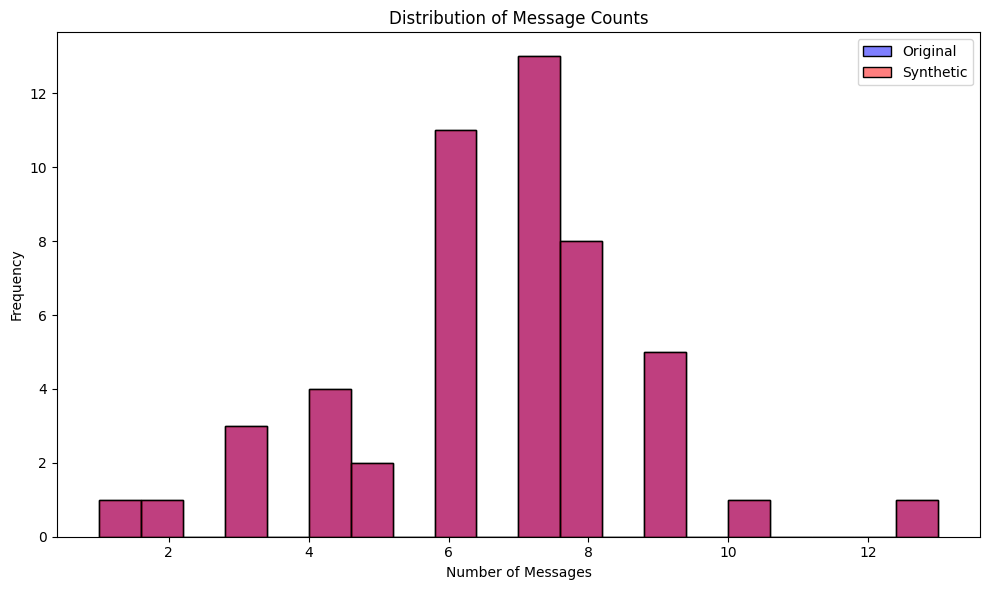

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze message counts in conversations
results = []
for idx, row in df.iterrows():
    results.append({
        'conversation_id': row['conversation_id'],
        'orig_message_count': len(row['orig_messages']),
        'synth_message_count': len(row['synthetic_messages'])
    })

# Convert to DataFrame for easy viewing
comparison_df = pd.DataFrame(results)

# Display summary statistics
print("Message count statistics:")
print("\nOriginal messages:")
print(comparison_df['orig_message_count'].describe())
print("\nSynthetic messages:")
print(comparison_df['synth_message_count'].describe())

# Find conversations with mismatched counts
msg_mismatched = comparison_df[comparison_df['orig_message_count'] != comparison_df['synth_message_count']]
print(f"\nNumber of conversations with mismatched message counts: {len(msg_mismatched)}")

# Calculate average difference
avg_msg_diff = (comparison_df['orig_message_count'] - comparison_df['synth_message_count']).mean()
print(f"Average difference in message counts (orig - synth): {avg_msg_diff:.2f}")

# Create overlapping histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=comparison_df, x='orig_message_count', bins=20, alpha=0.5, label='Original', color='blue')
sns.histplot(data=comparison_df, x='synth_message_count', bins=20, alpha=0.5, label='Synthetic', color='red')
plt.title('Distribution of Message Counts')
plt.xlabel('Number of Messages')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()